In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
import squidpy as sq
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/'
anndata_objects = []
name_anndata = "A1-1"+"/"+"anndataNucA11"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "A1-2"+"/"+"anndataNucA12"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "C2"+"/"+"anndataNucC2"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "D2-1"+"/"+"anndataNucD21"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "PS"+"/"+"ps_slice"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
samples = ["A1-1", "A1-2", "C2", "D2-1", "PS"]

In [12]:
anndata = anndata_objects[0]
annotation1 = 'annotation_score_genes_original_Atlas_Scores_12'
annotation2 = 'annotation_own_score_genes_Atlas_Scores_12'
# get proportions of anndata.obs[annotation1]
print(anndata.obs[annotation1].value_counts(normalize=True)*100)
print(anndata.obs[annotation2].value_counts(normalize=True)*100)

Hepa            69.467340
LSEC            10.050518
Kupf             5.051848
Portal vein      3.669237
Stel             3.288133
Chol             2.144820
Meso             1.976425
B cell           1.559869
Oth im           1.293982
Fibr             1.125587
Portal LAM       0.274750
Central vein     0.097492
Name: annotation_score_genes_original_Atlas_Scores_12, dtype: float64
Hepa            61.756625
LSEC            12.230790
Kupf             6.088806
Stel             5.406364
Oth im           2.579101
Portal vein      2.322077
Chol             2.313215
Fibr             1.923247
B cell           1.639635
Unknown          1.568732
Central vein     0.895152
Meso             0.735620
Portal LAM       0.540636
Name: annotation_own_score_genes_Atlas_Scores_12, dtype: float64


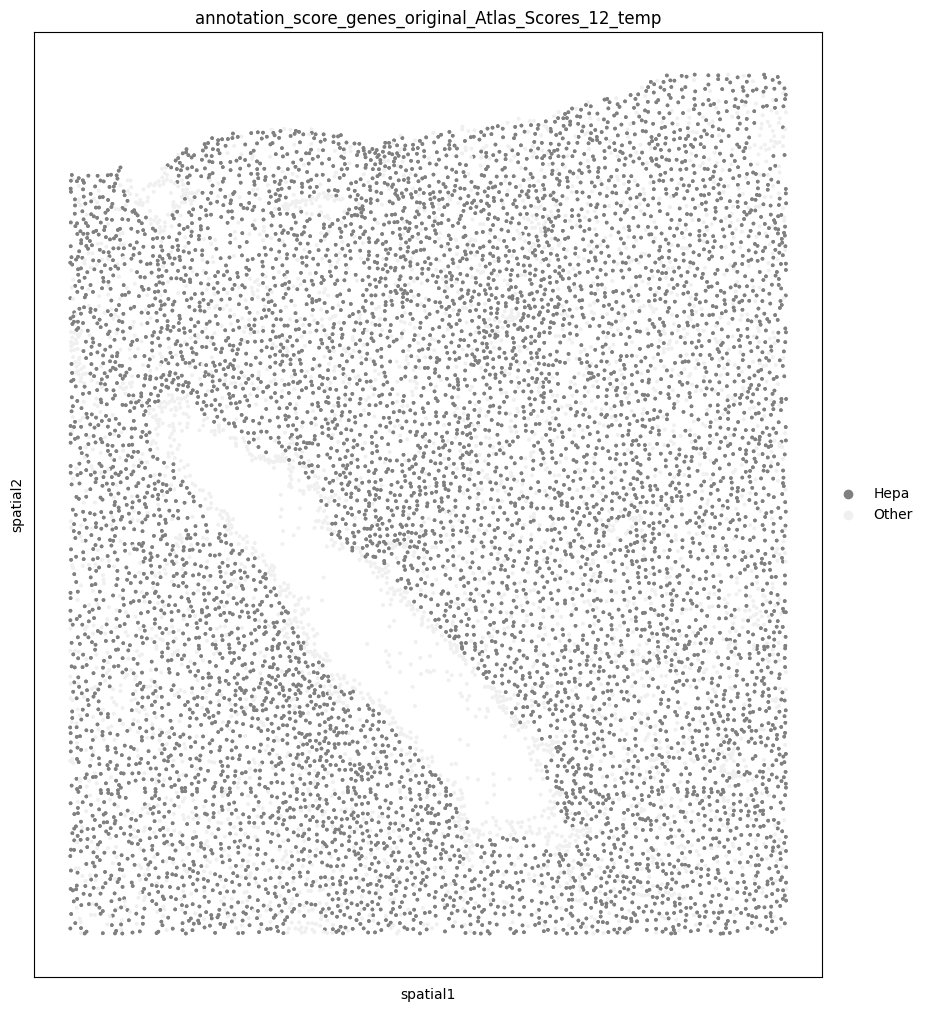

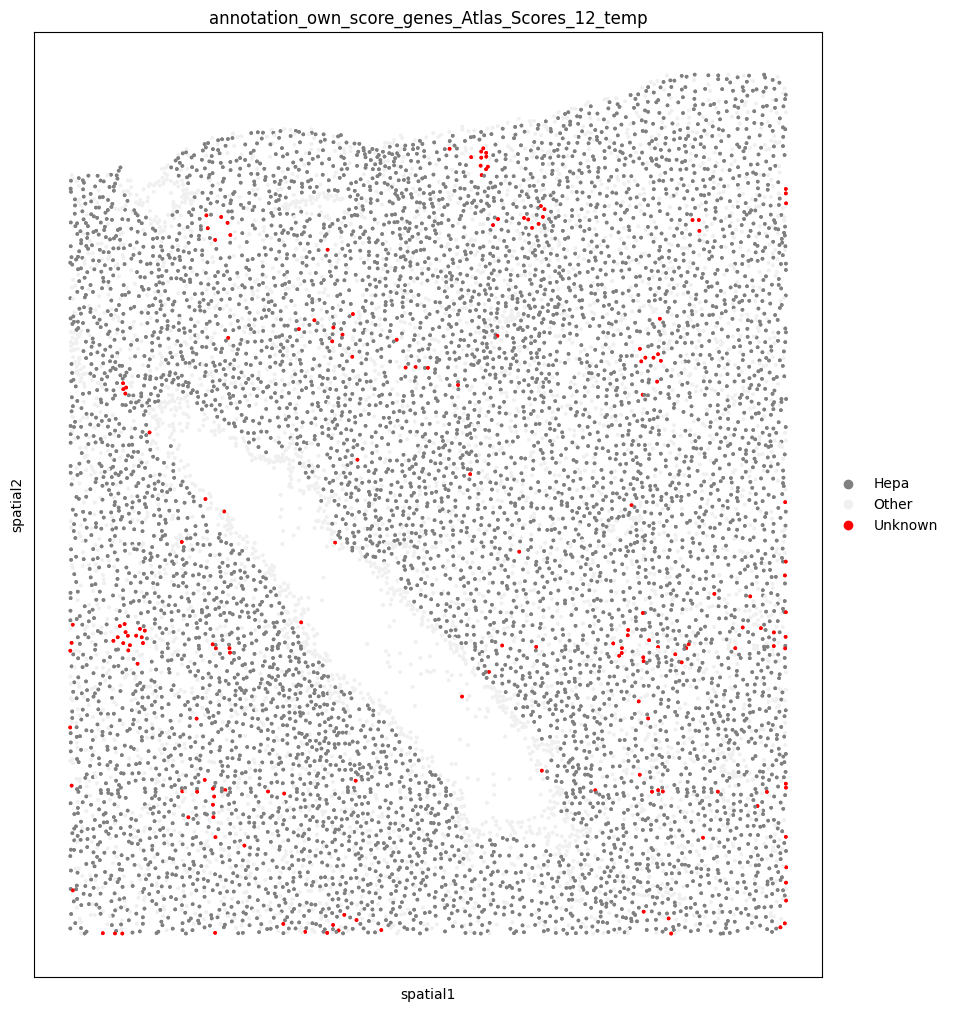

In [13]:
anndata = anndata_objects[0]
anndata.obs[annotation1+'_temp'] = anndata.obs[annotation1]
anndata.obs[annotation2+'_temp'] = anndata.obs[annotation2]
anndata.obs[annotation1+'_temp'] = anndata.obs[annotation1+'_temp'].apply(lambda x: x if x == 'Unknown' or x == 'Hepa' else 'Other')
anndata.obs[annotation2+'_temp'] = anndata.obs[annotation2+'_temp'].apply(lambda x: x if x == 'Unknown' or x == 'Hepa' else 'Other')
anndata.uns[annotation2+'_temp_colors'] = ['#808080','#F0F0F0','#FF0000']
anndata.uns[annotation1+'_temp_colors'] = ['#808080','#F0F0F0']
sq.pl.spatial_scatter(anndata,color=annotation1+'_temp',shape=None, figsize=(10, 10)) 
sq.pl.spatial_scatter(anndata,color=annotation2+'_temp',shape=None, figsize=(10, 10)) 

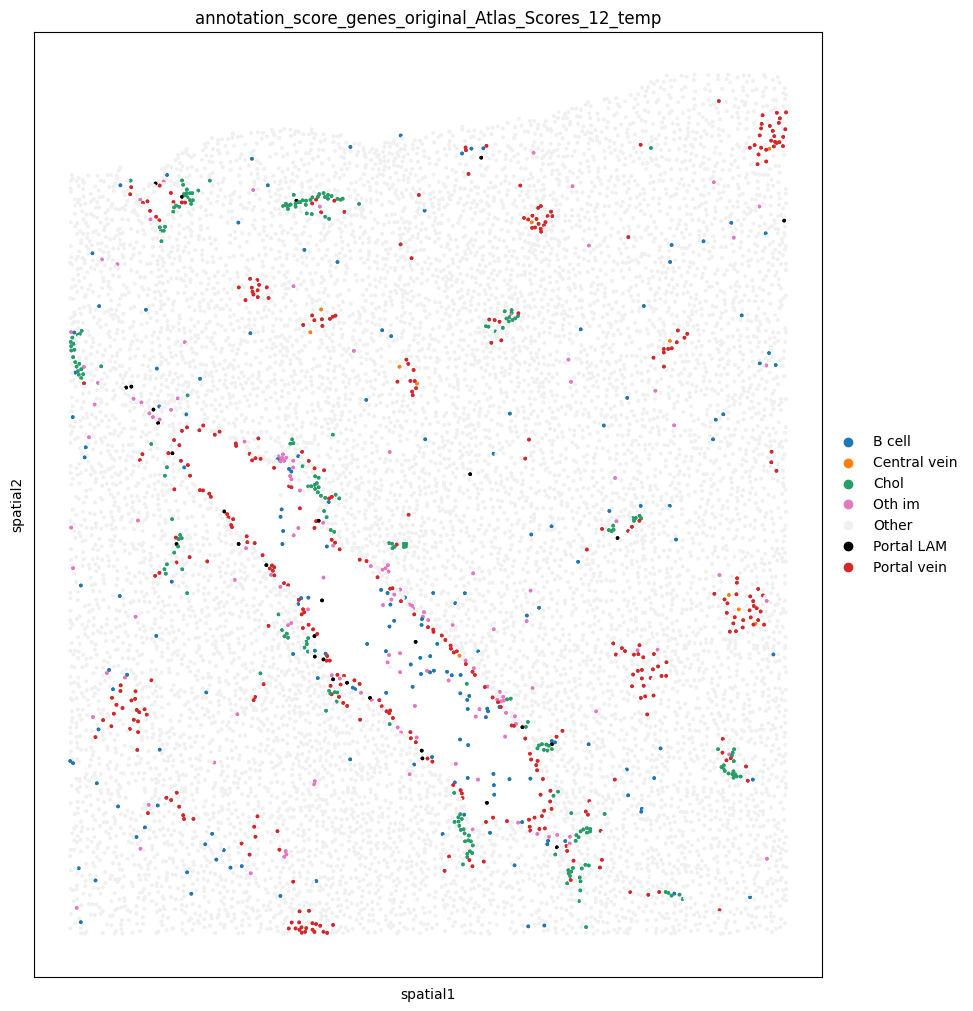

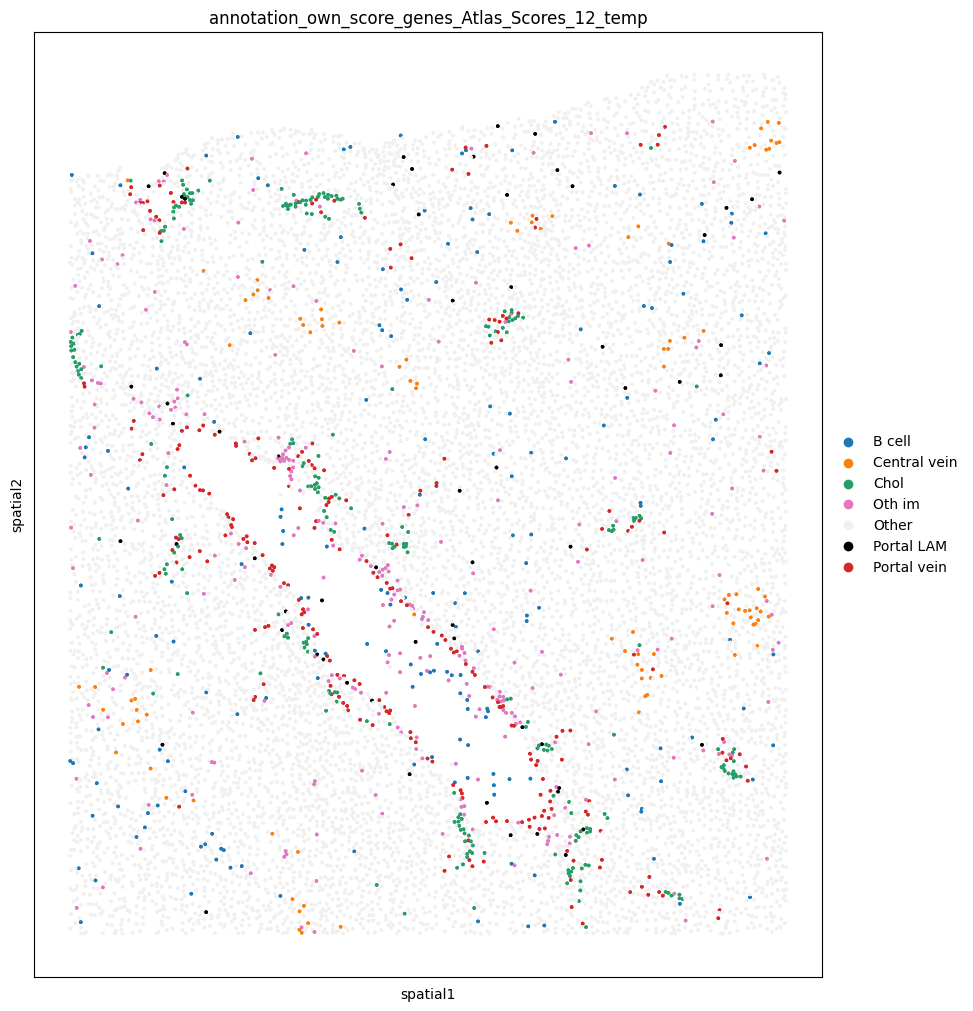

In [14]:
anndata = anndata_objects[0]
anndata.obs[annotation1+'_temp'] = anndata.obs[annotation1]
anndata.obs[annotation2+'_temp'] = anndata.obs[annotation2]
anndata.obs[annotation1+'_temp'] = anndata.obs[annotation1+'_temp'].apply(lambda x: x if x == 'Central vein' or x == 'Portal vein' or x == 'Chol' or x == 'B cell' or x == 'Portal LAM' or x == 'Oth im' else 'Other')
anndata.obs[annotation2+'_temp'] = anndata.obs[annotation2+'_temp'].apply(lambda x: x if x == 'Central vein' or x == 'Portal vein' or x == 'Chol' or x == 'B cell' or x == 'Portal LAM' or x == 'Oth im' else 'Other')
anndata.uns[annotation1+'_temp_colors'] = ['#1f77b4', '#ff7f0e', '#279e68','#e377c2','#F0F0F0', '#000000','#d62728']
anndata.uns[annotation2+'_temp_colors'] = ['#1f77b4', '#ff7f0e', '#279e68','#e377c2','#F0F0F0', '#000000','#d62728']
sq.pl.spatial_scatter(anndata,color=annotation1+'_temp',shape=None, figsize=(10, 10)) 
sq.pl.spatial_scatter(anndata,color=annotation2+'_temp',shape=None, figsize=(10, 10))

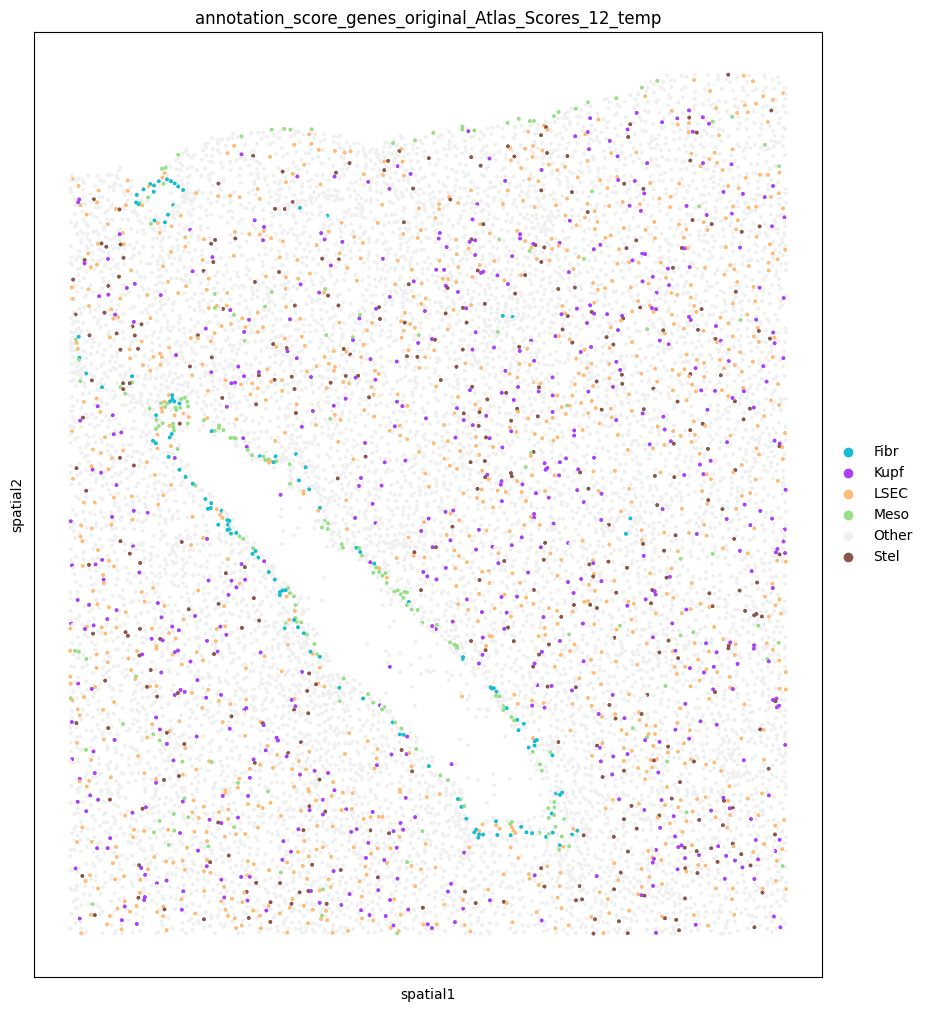

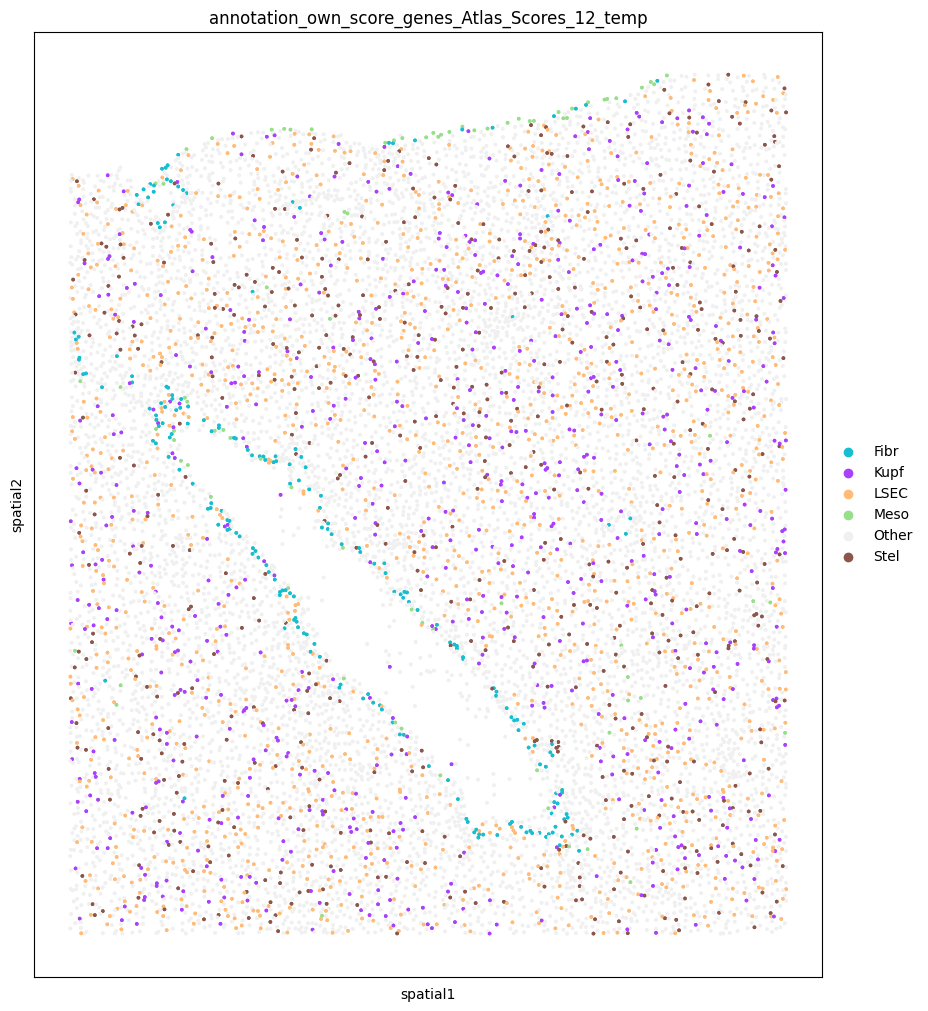

In [15]:
anndata = anndata_objects[0]
anndata.obs[annotation1+'_temp'] = anndata.obs[annotation1]
anndata.obs[annotation2+'_temp'] = anndata.obs[annotation2]
anndata.obs[annotation1+'_temp'] = anndata.obs[annotation1+'_temp'].apply(lambda x: x if x == 'LSEC' or x == 'Kupf' or x == 'Fibr' or x == 'Meso' or x == 'Stel' else 'Other')
anndata.obs[annotation2+'_temp'] = anndata.obs[annotation2+'_temp'].apply(lambda x: x if x == 'LSEC' or x == 'Kupf' or x == 'Fibr' or x == 'Meso' or x == 'Stel' else 'Other')
anndata.uns[annotation1+'_temp_colors'] = ['#17becf', '#aa40fc', '#ffbb78', '#98df8a','#F0F0F0','#8c564b']
anndata.uns[annotation2+'_temp_colors'] = ['#17becf', '#aa40fc', '#ffbb78', '#98df8a','#F0F0F0','#8c564b']
sq.pl.spatial_scatter(anndata,color=annotation1+'_temp',shape=None, figsize=(10, 10)) 
sq.pl.spatial_scatter(anndata,color=annotation2+'_temp',shape=None, figsize=(10, 10))

In [16]:
cut_off = 0.2
changes = changing_cell_types(anndata,annotation1,annotation2,cut_off=cut_off)
changing_cell_types(anndata,annotation1,annotation2,cut_off=0.1)
sum_changes_sign = 0
for i in range(len(changes)):
    sum_changes_sign += changes[i][1]
sum_changes_sign = round(sum_changes_sign,2)
changes_dict = {changes[i][0]: changes[i][1] for i in range(len(changes))}
changes

[[('Hepa', 'LSEC'), 2.25],
 [('Hepa', 'Stel'), 1.61],
 [('Hepa', 'Unknown'), 1.18],
 [('Hepa', 'Kupf'), 0.86],
 [('Hepa', 'Oth im'), 0.74],
 [('Meso', 'Fibr'), 0.7],
 [('Portal vein', 'Hepa'), 0.68],
 [('Meso', 'Stel'), 0.56],
 [('Portal vein', 'Central vein'), 0.5],
 [('Hepa', 'B cell'), 0.42],
 [('Hepa', 'Chol'), 0.29],
 [('Hepa', 'Portal vein'), 0.28],
 [('Hepa', 'Portal LAM'), 0.27],
 [('B cell', 'Oth im'), 0.27],
 [('Hepa', 'Meso'), 0.26]]

In [17]:
anndata = anndata_objects[0]
l1 = anndata.obs[annotation1].to_list()
l2 = anndata.obs[annotation2]
diff = l1 == l2
perc_changed = 100*diff.value_counts()/len(diff)
perc_changed = round(perc_changed[False],2)
print(perc_changed)
perc_changed_not_sign = perc_changed - sum_changes_sign
perc_changed_not_sign = round(perc_changed_not_sign,2)
perc_changed_not_sign

13.99


3.12

In [18]:
changes_pairs = [x[0] for x in changes]
anndata.obs['diff'] = list(zip(anndata.obs[annotation1],anndata.obs[annotation2]))
# if tuple contains 2 same values, then change to 'Same'
anndata.obs['diff'] = anndata.obs['diff'].apply(lambda x: ('Same',100-perc_changed) if x[0] == x[1] else x)
anndata.obs['diff'] = anndata.obs['diff'].apply(lambda x: ('Other change',perc_changed_not_sign) if x not in changes_pairs and x != ('Same',100-perc_changed) else x)
anndata.obs['diff'] = anndata.obs['diff'].apply(lambda x: ((x[0]+' -> '+x[1]),changes_dict[x]) if x in changes_pairs else x)
# make it a category
anndata.obs['diff'] = anndata.obs['diff'].astype('category')
anndata.obs['diff']

cells
65              (Same, 86.01)
66              (Same, 86.01)
67              (Same, 86.01)
129             (Same, 86.01)
130       (Meso -> Fibr, 0.7)
                 ...         
32713           (Same, 86.01)
32777           (Same, 86.01)
32841           (Same, 86.01)
32905    (Other change, 3.12)
32969           (Same, 86.01)
Name: diff, Length: 11283, dtype: category
Categories (17, object): [('B cell -> Oth im', 0.27), ('Hepa -> B cell', 0.42), ('Hepa -> Chol', 0.29), ('Hepa -> Kupf', 0.86), ..., ('Other change', 3.12), ('Portal vein -> Central vein', 0.5), ('Portal vein -> Hepa', 0.68), ('Same', 86.01)]

In [19]:
colors = []
for c in plt.cm.tab20.colors: colors.append(matplotlib.colors.to_hex(c))
for c in plt.cm.tab20b.colors: colors.append(matplotlib.colors.to_hex(c))

In [20]:
n_categories = len(anndata.obs['diff'].cat.categories)
# get index of category 'Same'
idx_same = anndata.obs['diff'].cat.categories.get_loc(('Same',100-perc_changed))
idx_same

16

In [21]:
anndata.uns['diff_colors'] = colors[:n_categories]
# change color at index idx_same to grey
anndata.uns['diff_colors'][idx_same] = '#F0F0F0'

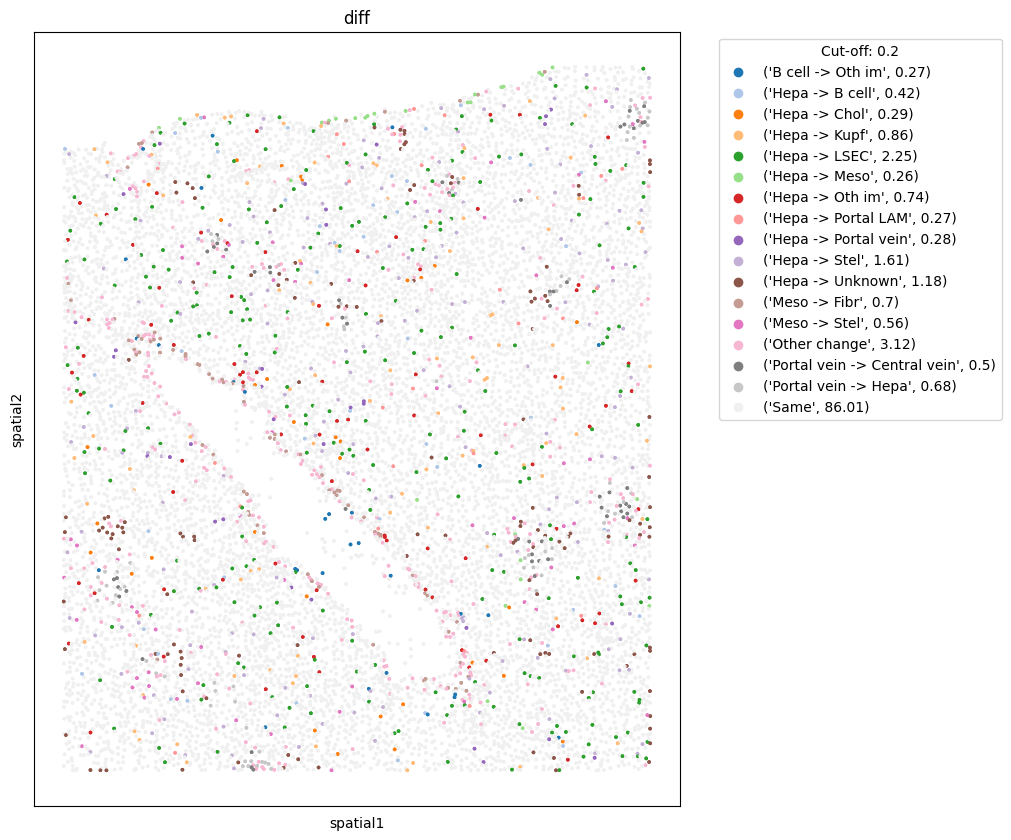

In [22]:
sq.pl.spatial_scatter(anndata,color='diff',shape=None, figsize=(10, 10)) 
# add title to legend
plt.legend(title='Cut-off: '+str(cut_off), bbox_to_anchor=(1.05, 1), loc='upper left')

In [23]:
anno1_co_ocs = []
anno2_co_ocs = []
diff_co_ocs = []

A1-1


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Unknown']
A1-2


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Unknown']
C2


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Unknown']
D2-1


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Unknown']
PS


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Unknown']


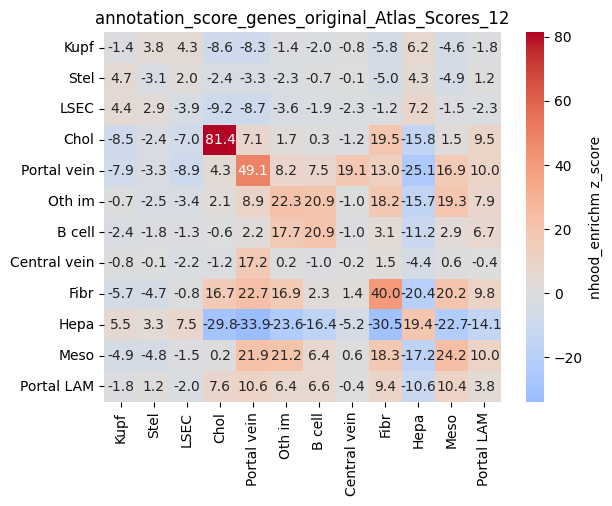

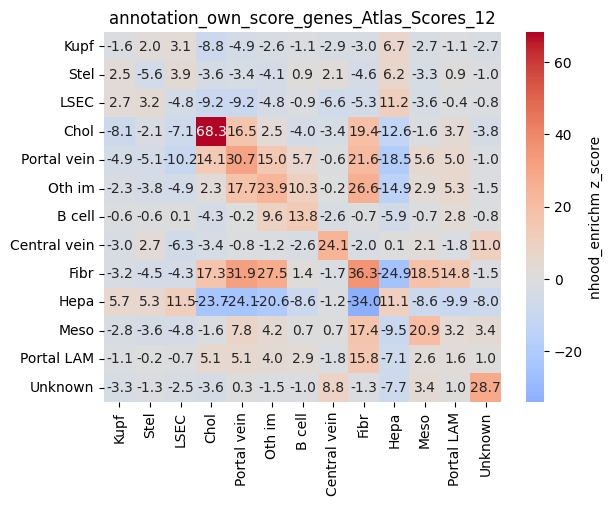

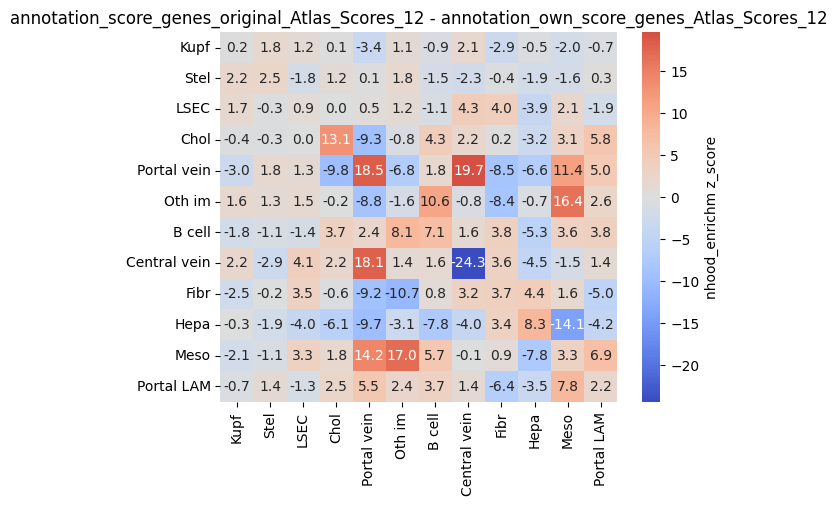

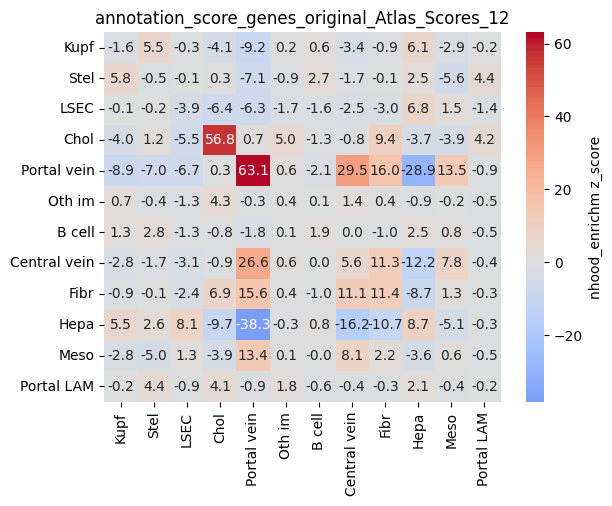

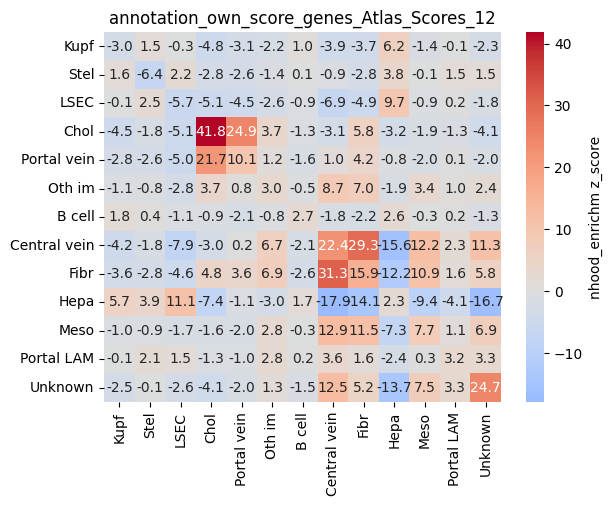

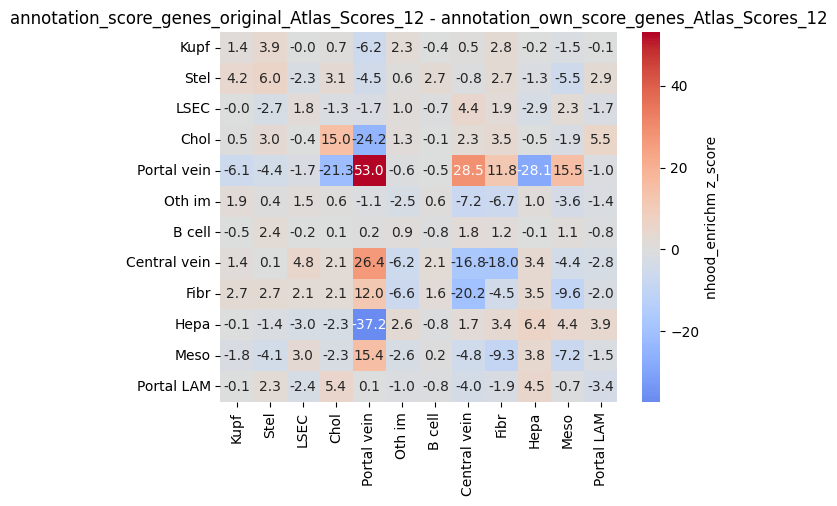

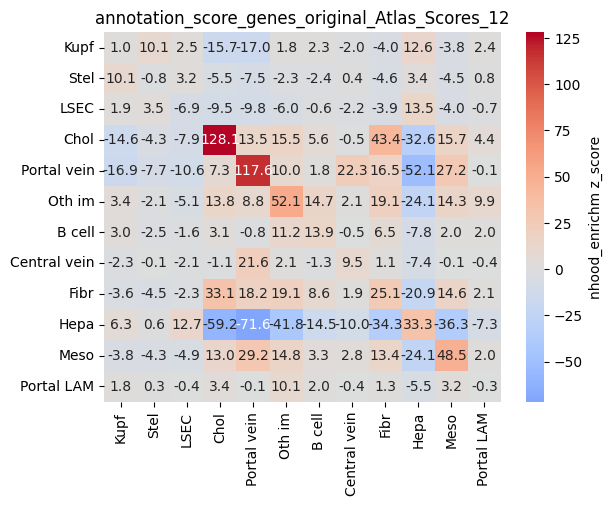

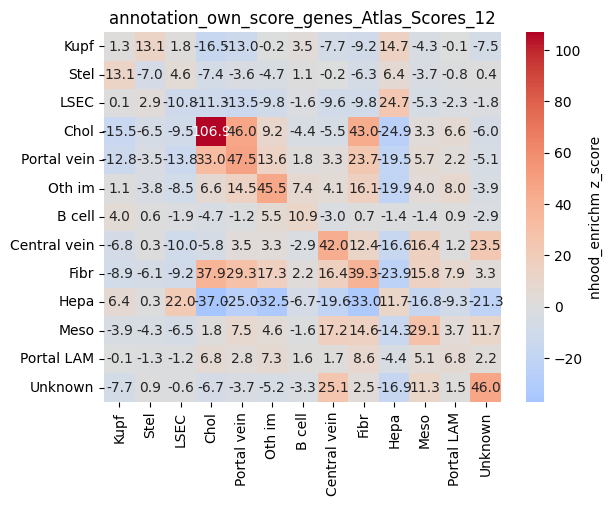

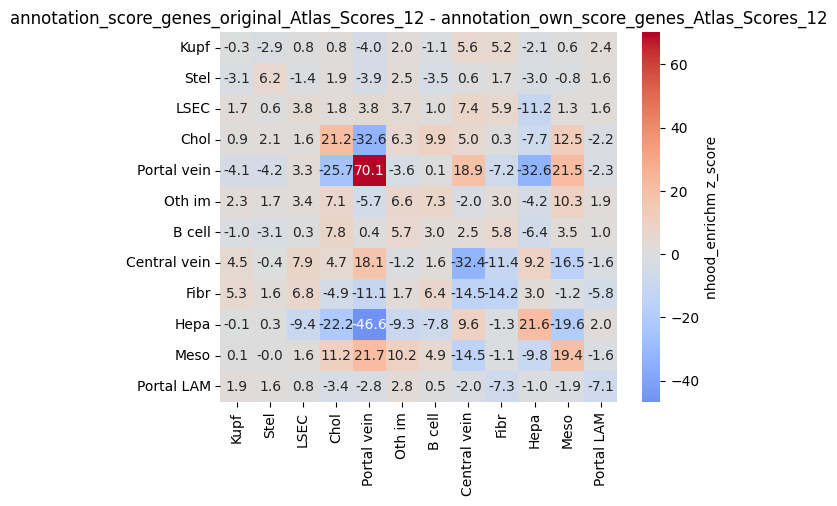

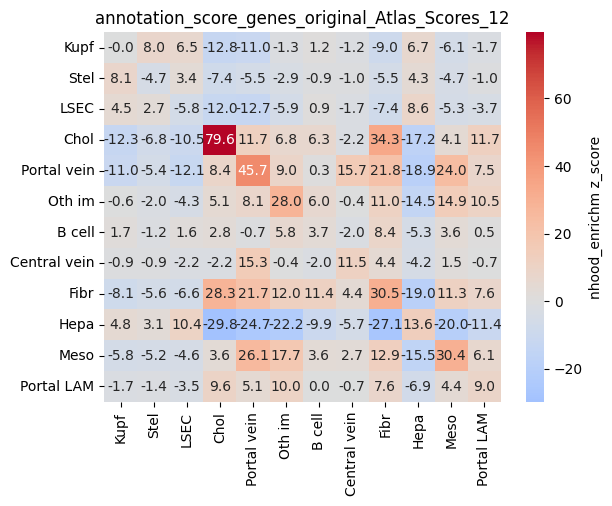

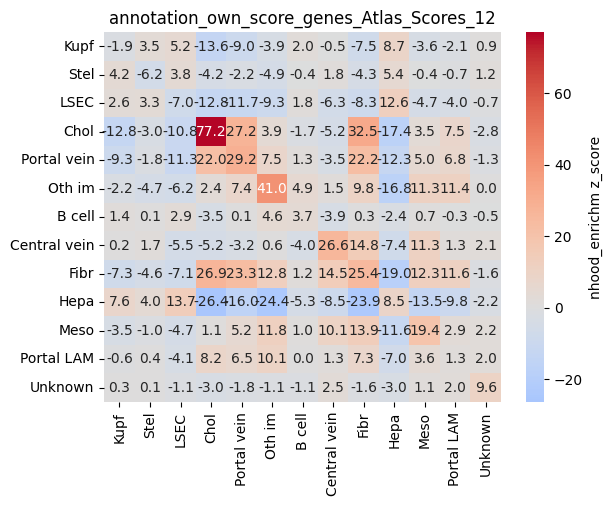

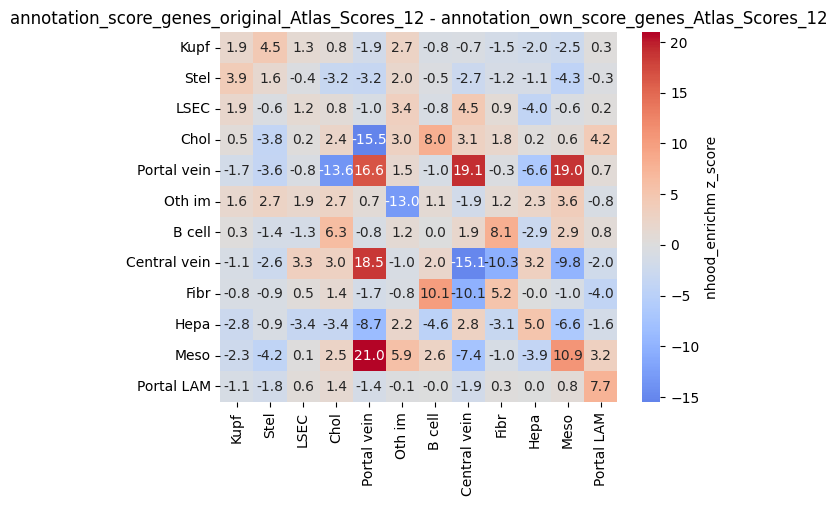

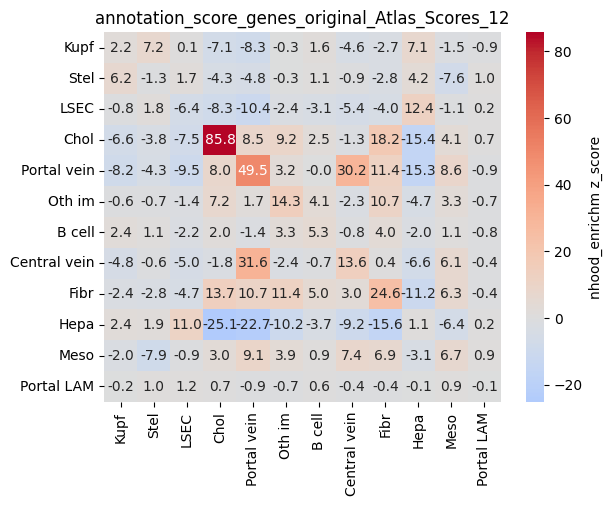

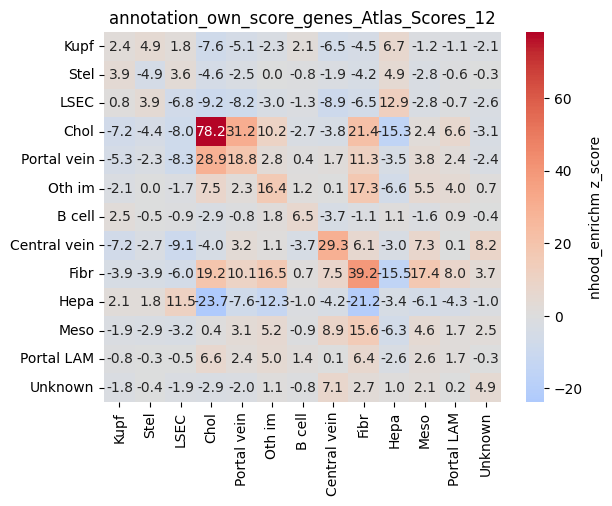

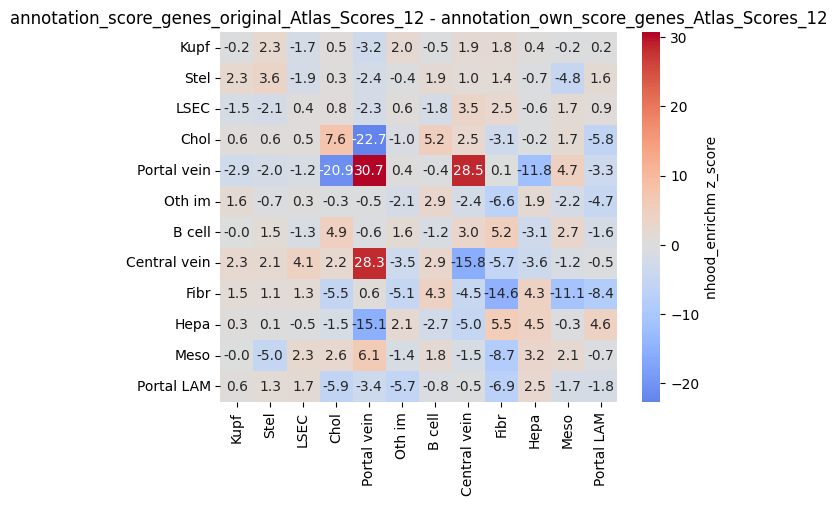

In [24]:
for i in range(len(anndata_objects)):
    print(samples[i])
    anno1_co_oc,anno2_co_oc,diff_co_oc = compare_co_occurrence(anndata_objects[i], annotation1, annotation2)
    anno1_co_ocs.append(anno1_co_oc)
    anno2_co_ocs.append(anno2_co_oc)
    diff_co_ocs.append(diff_co_oc)

Kupf  Stel  LSEC  Chol  Portal vein  Oth im  B cell  \
Kupf           0.0   6.9   2.6  -9.7        -10.8    -0.2     0.8   
Stel           7.0  -2.1   2.0  -3.9         -5.6    -1.7    -0.0   
LSEC           2.0   2.1  -5.4  -9.1         -9.6    -3.9    -1.3   
Chol          -9.2  -3.2  -7.7  86.3          8.3     7.6     2.7   
Portal vein  -10.6  -5.5  -9.6   5.7         65.0     6.2     1.5   
Oth im         0.5  -1.5  -3.1   6.5          5.5    23.4     9.2   
B cell         1.2  -0.3  -1.0   1.3         -0.5     7.6     9.1   
Central vein  -2.3  -0.7  -2.9  -1.4         22.5     0.0    -1.0   
Fibr          -4.1  -3.5  -3.4  19.7         17.8    11.9     5.2   
Hepa           4.9   2.3   9.9 -30.7        -38.2   -19.6    -8.8   
Meso          -3.9  -5.4  -2.1   3.2         20.0    11.5     2.9   
Portal LAM    -0.4   1.1  -1.1   5.1          2.8     5.5     1.7   

              Central vein  Fibr  Hepa  Meso  Portal LAM  
Kupf                  -2.4  -4.5   7.7  -3.8        -0.5  
Stel                  -0.6  -3.6   3.7  -5.5         1.3  
LSEC                  -2.8  -3.9   9.7  -2.1        -1.6  
Chol                  -1.2  25.0 -16.9   4.3         6.1  
Portal vein           23.3  15.8 -28.1  18.0         3.1  
Oth im                -0.0  11.9 -12.0  10.3         5.4  
B cell                -0.8   4.2  -4.8   2.1         1.6  
Central vein           8.0   3.8  -6.9   3.2        -0.5  
Fibr                   4.4  26.3 -16.1  10.7         3.7  
Hepa                  -9.3 -23.6  15.2 -18.1        -6.6  
Meso                   4.3  10.8 -12.7  22.1         3.7  
Portal LAM            -0.5   3.5  -4.2   3.7         2.5

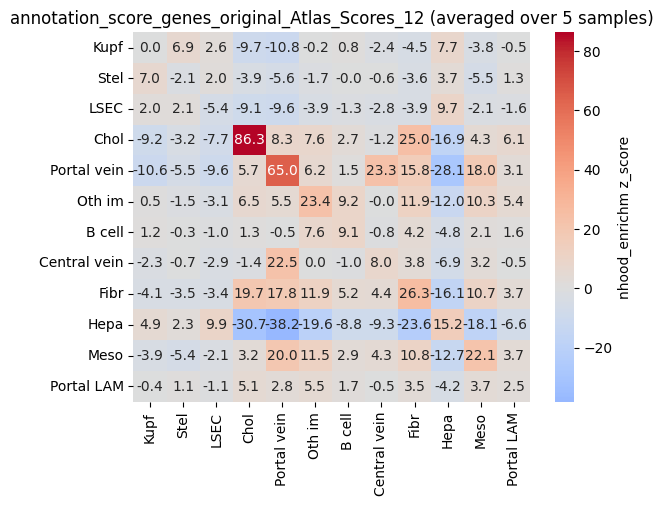

In [25]:
calculate_average_df(anno1_co_ocs,annotation1+' (averaged over 5 samples)')

Kupf  Stel  LSEC  Chol  Portal vein  Oth im  B cell  \
Kupf          -0.5   5.0   2.3 -10.3         -7.0    -2.2     1.5   
Stel           5.1  -6.0   3.6  -4.5         -2.9    -3.0     0.1   
LSEC           1.2   3.2  -7.0  -9.5         -9.4    -5.9    -0.6   
Chol          -9.6  -3.6  -8.1  74.5         29.2     5.9    -2.8   
Portal vein   -7.0  -3.0  -9.7  23.9         27.2     8.0     1.5   
Oth im        -1.3  -2.6  -4.8   4.5          8.5    25.9     4.7   
B cell         1.8   0.0  -0.2  -3.3         -0.8     4.2     7.5   
Central vein  -4.2   0.1  -7.8  -4.3          0.6     2.1    -3.1   
Fibr          -5.4  -4.4  -6.2  21.2         19.6    16.2     0.6   
Hepa           5.5   3.1  14.0 -23.6        -14.8   -18.5    -4.0   
Meso          -2.6  -2.5  -4.2   0.0          4.3     5.7    -0.2   
Portal LAM    -0.5   0.2  -1.0   5.1          3.2     5.8     1.2   
Unknown       -3.0  -0.2  -1.7  -4.0         -1.8    -1.1    -1.5   

              Central vein  Fibr  Hepa  Meso  Portal LAM  Unknown  
Kupf                  -4.3  -5.6   8.6  -2.6        -0.9     -2.7  
Stel                   0.2  -4.4   5.3  -2.1         0.1      0.4  
LSEC                  -7.7  -7.0  14.2  -3.5        -1.4     -1.5  
Chol                  -4.2  24.4 -14.7   1.1         4.6     -4.0  
Portal vein            0.4  16.6 -10.9   3.6         3.3     -2.3  
Oth im                 2.8  15.4 -12.0   5.4         5.9     -0.5  
B cell                -3.0  -0.6  -1.2  -0.7         0.9     -1.2  
Central vein          28.9  12.1  -8.5   9.9         0.6     11.2  
Fibr                  13.6  31.2 -19.1  15.0         8.8      2.0  
Hepa                 -10.3 -25.2   6.0 -10.9        -7.5     -9.8  
Meso                  10.0  14.6  -9.8  16.4         2.5      5.3  
Portal LAM             1.0   7.9  -4.7   2.8         2.9      1.6  
Unknown               11.2   1.5  -8.1   5.1         1.6     22.8

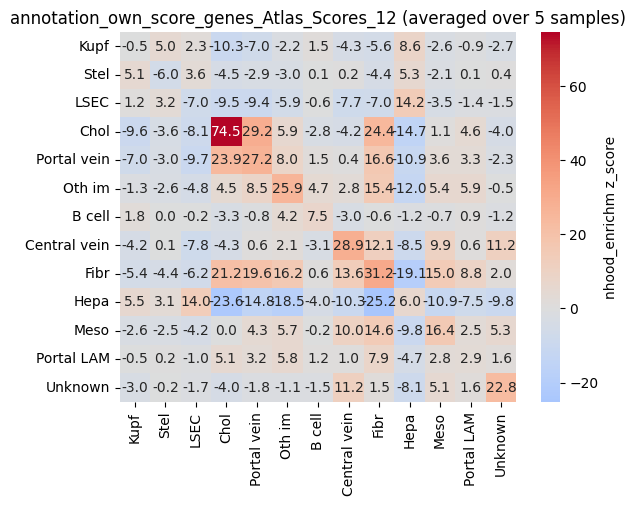

In [26]:
calculate_average_df(anno2_co_ocs,annotation2+' (averaged over 5 samples)')

Kupf  Stel  LSEC  Chol  Portal vein  Oth im  B cell  \
Kupf           0.6   1.9   0.3   0.6         -3.7     2.0    -0.7   
Stel           1.9   4.0  -1.5   0.7         -2.8     1.3    -0.2   
LSEC           0.7  -1.0   1.6   0.4         -0.1     2.0    -0.7   
Chol           0.4   0.3   0.4  11.9        -20.9     1.7     5.5   
Portal vein   -3.6  -2.5   0.2 -18.2         37.8    -1.8    -0.0   
Oth im         1.8   1.1   1.7   2.0         -3.1    -2.5     4.5   
B cell        -0.6  -0.3  -0.8   4.6          0.3     3.5     1.6   
Central vein   1.9  -0.7   4.8   2.9         21.9    -2.1     2.0   
Fibr           1.2   0.9   2.8  -1.5         -1.9    -4.3     4.6   
Hepa          -0.6  -0.8  -4.0  -7.1        -23.5    -1.1    -4.8   
Meso          -1.2  -2.9   2.1   3.2         15.6     5.8     3.0   
Portal LAM     0.1   0.9  -0.1   0.0         -0.4    -0.3     0.5   

              Central vein  Fibr  Hepa  Meso  Portal LAM  
Kupf                   1.9   1.1  -0.9  -1.1         0.4  
Stel                  -0.8   0.8  -1.6  -3.4         1.2  
LSEC                   4.8   3.1  -4.5   1.4        -0.2  
Chol                   3.0   0.5  -2.3   3.2         1.5  
Portal vein           22.9  -0.8 -17.1  14.4        -0.2  
Oth im                -2.9  -3.5   0.0   4.9        -0.5  
B cell                 2.2   4.8  -3.6   2.8         0.6  
Central vein         -20.9  -8.4   1.6  -6.7        -1.1  
Fibr                  -9.2  -4.9   3.1  -4.3        -5.0  
Hepa                   1.0   1.6   9.2  -7.2         0.9  
Meso                  -5.7  -3.8  -2.9   5.7         1.2  
Portal LAM            -1.4  -4.4   0.5   0.9        -0.5

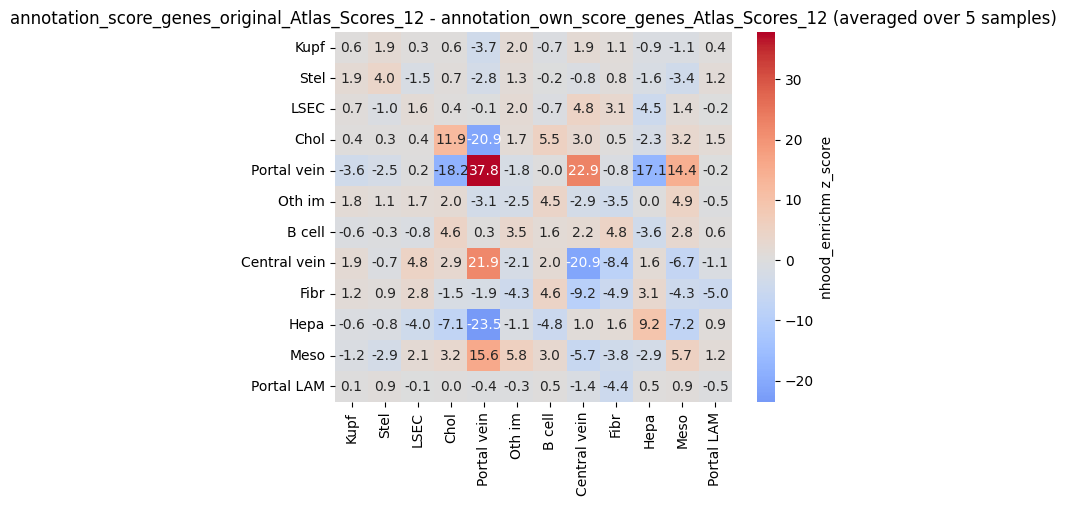

In [27]:
calculate_average_df(diff_co_ocs,annotation1 + ' - ' + annotation2 + ' (averaged over 5 samples)')